<a href="https://colab.research.google.com/github/Pramsi/Can-t_tame_that_Python_Semester_Project/blob/manuel/Can't_tame_that_Python_Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
#for data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Other tooling
import os

#NLP
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
!pip install --upgrade emoji
import emoji
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 6.2 MB/s eta 0:00:00


#Import Datafiles

In [ ]:
# create kaggle directory and add kaggle.json
from google.colab import files
files.upload()

! mkdir -p ~/.kaggle #create kaggle directory
! mv kaggle.json ~/.kaggle/ #move json file there
! chmod 600 ~/.kaggle/kaggle.json #change permission of the file

Saving kaggle.json to kaggle.json


In [ ]:
#create gitignore and add kaggle
%%writefile .gitignore
.kaggle/

Writing .gitignore


In [ ]:
#upload brexit dataset
!kaggle datasets download -d visalakshiiyer/twitter-data-brexit
! mkdir brexitTweets #create folder with files
! unzip twitter-data-brexit.zip -d brexitTweets #unzip data and save in folder

 99% 70.0M/70.9M [00:04<00:00, 17.4MB/s]
100% 70.9M/70.9M [00:04<00:00, 16.0MB/s]
Archive:  twitter-data-brexit.zip
  inflating: brexitTweets/TweetDataset_AntiBrexit_Jan-Mar2022.csv  
  inflating: brexitTweets/TweetDataset_ProBrexit_Jan-Mar2022.csv  


In [ ]:
!ls -a


 .    brexitTweets   .gitignore         sample_data
 ..   .config	    'kaggle (1).json'   twitter-data-brexit.zip


In [ ]:
#Load Datasets
dfAnti = pd.read_csv("brexitTweets/TweetDataset_AntiBrexit_Jan-Mar2022.csv")
dfPro = pd.read_csv("brexitTweets/TweetDataset_ProBrexit_Jan-Mar2022.csv")

In [ ]:
#Check Data
dfAnti.head()

,Unnamed: 0,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,0,09-Jan-2022 11:58PM,NaN,https://twitter.com/nickynicky77551/statuses/1...,NaN,"RT @cnapan: #JohnsonOut is now running at 218,...",Twitter,@nickynicky77551,Unknown,NaN,...,nicky@nicky7755,https://twitter.com/nickynicky77551,"Ardent Remainer; Rejoiner now, Support NHS 💙 #...",1697.0,2576.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
1,1,09-Jan-2022 11:58PM,NaN,https://twitter.com/lines12345/statuses/148032...,NaN,RT @Femi_Sorry: My point: Any Labour leader wh...,Twitter,@lines12345,Unknown,NaN,...,Helen,https://twitter.com/lines12345,Tory hating Remainer,11.0,92.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
2,2,09-Jan-2022 11:58PM,NaN,https://twitter.com/millymoo97/statuses/148032...,NaN,RT @andy_murray: QT @Nigel_Farage: Please reco...,Twitter,@millymoo97,Unknown,NaN,...,seonaid mcgill,https://twitter.com/millymoo97,"Scottish, European, anti-Brexit, pro-EU, freel...",2129.0,3880.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
3,3,09-Jan-2022 11:58PM,NaN,https://twitter.com/ValueSurplus/statuses/1480...,NaN,RT @mikegalsworthy: We’re the first country in...,Twitter,@valuesurplus,United Kingdom,NaN,...,Rightwing politics is a social virus #BLM 🇵🇸🌈,https://twitter.com/ValueSurplus,Classical Cultural Marxist.\nAnti Brexit estab...,2420.0,4952.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
4,4,09-Jan-2022 11:57PM,NaN,https://twitter.com/Jackcdawes/statuses/148032...,NaN,"RT @StevePeers: QT @andy_murray: Game, set and...",Twitter,@jackcdawes,United Kingdom,NaN,...,Jack Dawes #FBPEGlobal #JohnsonOut #RejoinEU,https://twitter.com/Jackcdawes,"Lover of crime & horror fiction, history, & Me...",18304.0,19889.0,"Jan 9, 2022",11:57 PM,England,London,NaN


#Preprocessing

In [ ]:
# label pro and anti tweets and concatenate the two files
dfAnti['Position'] = 0
dfPro['Position'] = 1

df = pd.concat([dfAnti, dfPro])

#drop unwanted data
df.drop(['Unnamed: 0', 'Date', 'Headline', 'URL', 'Opening Text', 'Source', 'Influencer', 'Country', 'Subregion', 'Language', 'Reach', 'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo', 'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership', 'Engagement', 'AVE', 'Key Phrases', 'Input Name', 'Keywords', 'Twitter Authority', 'Tweet Id', 'Twitter Id', 'Twitter Client', 'Twitter Screen Name', 'User Profile Url', 'Twitter Bio', 'Twitter Followers', 'Twitter Following', 'Alternate Date Format', 'Time', 'State', 'City', 'Document Tags'], axis = 1, inplace=True)

#count the data
df.Position.value_counts()

0    210574
1    147631
Name: Position, dtype: int64

In [ ]:
#Clean Hit Sentence - Remove Retweets
df_no_rt = df[df['Hit Sentence'].str.contains("RT @")==False]
df_no_qt = df_no_rt[df_no_rt['Hit Sentence'].str.contains("QT @")==False]

#how many tweets were retweeted and qoted?
print(f'Amount of retweets and quote tweets in percentage:{round(100*(1-len(df_no_qt)/len(df)),1)}%')
print(df_no_qt)

Amount of retweets and quote tweets in percentage:78.8%
                                             Hit Sentence Sentiment  Position
7       @JayneMonie1 @HowardJ91352838 @davesumnersmith...   Neutral         0
17      @MPIainDS You have made it nigh on impossible ...   Neutral         0
21      @TheGhos72578902 @SallyAnnC3 @AndieHalihan @Ch...   Neutral         0
36      @snb19692 FPTP - totally discredited! Not leas...  Negative         0
39      @pauld4dog @jarviboy1974uk @LloydHardy Superma...   Neutral         0
...                                                   ...       ...       ...
147604  @sandieshoes We did have a fight, for years, t...   Neutral         1
147610  @ExpoSpurs He’s just another pathetic sneering...  Negative         1
147613  #BorisJohnsonOut inthegardenforaparty it’s not...   Neutral         1
147626  @JamesRobvincent @7nestingwrens He was also fi...   Neutral         1
147628  Ludicrous to suggest Boris is insulting Ukrain...  Negative         1

[76098 

In [ ]:
#How many Pro and Anti Tweets are left
df_no_qt.Position.value_counts()

1    40387
0    35711
Name: Position, dtype: int64

In [ ]:
#Preprocess Helper Functions

#to lower case
def lowercase(tweet: str) -> str:
  preprocessedTweet = str.lower(tweet)
  return preprocessedTweet

#remove hashtags
def remove_hashtags(tweet: str) -> str:
  preprocessedTweet = re.sub('#[a-zA-Z0-9_]+','',tweet)
  return preprocessedTweet

#remove mentions
def remove_mentions(tweet: str) -> str:
  preprocessedTweet = re.sub('@[a-zA-Z0-9_]+','',tweet)
  return preprocessedTweet

#remove emojis
def remove_emojis(tweet: str) -> str:
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub('', tweet)

#remove stopwords
def remove_stopwords(tweet: str) -> str:
    word_list = tweet.split()
    filtered_words = [word for word in word_list if word not in set(stopwords.words('english'))]
    return ' '.join(filtered_words)

# Function to combine all preprocessing steps
def preprocess_tweet(tweet: str) -> str:
    tweet = lowercase(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_mentions(tweet)
    tweet = remove_stopwords(tweet)
    tweet = remove_emojis(tweet)
    return tweet

In [ ]:
# no retweets and no quote tweets / no cleaned column yet
df_no_qt.head()

,Hit Sentence,Sentiment,Position
7,@JayneMonie1 @HowardJ91352838 @davesumnersmith...,Neutral,0
17,@MPIainDS You have made it nigh on impossible ...,Neutral,0
21,@TheGhos72578902 @SallyAnnC3 @AndieHalihan @Ch...,Neutral,0
36,@snb19692 FPTP - totally discredited! Not leas...,Negative,0
39,@pauld4dog @jarviboy1974uk @LloydHardy Superma...,Neutral,0


In [ ]:
# create cleaned tweet column
df_no_qt['tweet_clean'] = df_no_qt['Hit Sentence'].apply(preprocess_tweet)

<ipython-input-12-7e9d578539c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_qt['tweet_clean'] = df_no_qt['Hit Sentence'].apply(preprocess_tweet)


In [ ]:
# with cleaned tweet column
df_no_qt.head()

,Hit Sentence,Sentiment,Position,tweet_clean
7,@JayneMonie1 @HowardJ91352838 @davesumnersmith...,Neutral,0,"money’s sunak, (with gove & cummings) behind p..."
17,@MPIainDS You have made it nigh on impossible ...,Neutral,0,made nigh impossible share european funding st...
21,@TheGhos72578902 @SallyAnnC3 @AndieHalihan @Ch...,Neutral,0,haven’t wrong yet. said would lose. did. said ...
36,@snb19692 FPTP - totally discredited! Not leas...,Negative,0,fptp - totally discredited! least derisory 17....
39,@pauld4dog @jarviboy1974uk @LloydHardy Superma...,Neutral,0,supermarkets main brexit supporters quiet. bre...


#Split and Vectorize the data

In [ ]:
# Set X and y label
X_preprocessed = df_no_qt["tweet_clean"]
y = df_no_qt["Sentiment"]

In [ ]:
# Encode the y labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
#check encoded labels
for index, original_label in enumerate(label_encoder.classes_):
    print(f"Encoded Label: {index} -> Original Label: {original_label}")

Encoded Label: 0 -> Original Label: Negative
Encoded Label: 1 -> Original Label: Neutral
Encoded Label: 2 -> Original Label: Not Rated
Encoded Label: 3 -> Original Label: Positive


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3, random_state=42)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (53268,)
X_test shape:  (22830,)
y_train shape:  (53268,)
y_test shape:  (22830,)


In [ ]:
#Vectorize the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english') #make sure that all stopwords are excluded, stopword list might differ
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

count_vectorizer = CountVectorizer(stop_words="english") #make sure that all stopwords are excluded
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

#Train Models with Tfidf Vectorizer

In [ ]:
# Initialize a Support Vector Classifier (SVC) with a linear kernel
# svm_linear_tfidf = SVC(kernel='linear', C=1)

# Train the classifier using the tfidf training data and training labels
# svm_linear_tfidf.fit(tfidf_train, y_train)

In [ ]:
# Initialize a Logistic Regression Model
log_reg_tfidf = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)

#Train the Linear Regression Model using the tfidf data
log_reg_tfidf.fit(tfidf_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [ ]:
# Initialize a Random Forest Classifier
random_forest_tfidf = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
random_forest_tfidf.fit(tfidf_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Initialize Naive Bayes Classifier
nb_classifier_tfidf = MultinomialNB()

# Fit the Naive Bayes Classifier with the tfidf data
nb_classifier_tfidf.fit(tfidf_train, y_train)

MultinomialNB()

Make predictions with Tfidf vectorized data

In [ ]:
# Predict the labels for the tfidf vectorized data using a linear SVM model
# y_pred_svm_tfidf = svm_linear_tfidf.predict(tfidf_test)

# Predict the labels for the tfidf vectorized data using a logistic regression model
y_pred_logreg_tfidf = log_reg_tfidf.predict(tfidf_test)

# Predict the labels for the tfidf vectorized data using a Random Forest Classifier
y_pred_forest_tfidf = random_forest_tfidf.predict(tfidf_test)

# Predict the labels for the tfidf vectorized data using a Naive Bayes Classifier
y_pred_nb_tfidf = nb_classifier_tfidf.predict(tfidf_test)

Evaluate our Models with the Tfidf vectorized data

In [ ]:
#SVM Evaluation
# print(f"SVM Evaluation:")
# Calculate and print the accuracy score
# accuracy_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
# print(f"Accuracy: {accuracy_svm_tfidf}")

#  Calculate and print the F1 score
# f1_svm_tfidf = f1_score(y_test, y_pred_svm_tfidf, average='macro')
# print(f"F1 Score: {f1_svm_tfidf}")

#  Calculate and print the precision score
# precision_svm_tfidf = precision_score(y_test, y_pred_svm_tfidf, average='macro')
# print(f"Precision: {precision_svm_tfidf}")

#  Calculate and print the recall score
# recall_svm_tfidf = recall_score(y_test, y_pred_svm_tfidf, average='macro')
# print(f"Recall: {recall_svm_tfidf}")

# print(f"---------------------------------------------")

print(f"Logistic Regression Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_logreg_tfidf = accuracy_score(y_test, y_pred_logreg_tfidf)
print(f"Accuracy: {accuracy_logreg_tfidf}")

# Calculate and print the F1 score
f1_logreg_tfidf = f1_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"F1 Score: {f1_logreg_tfidf}")

# Calculate and print the precision score
precision_logreg_tfidf = precision_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"Precision: {precision_logreg_tfidf}")

# Calculate and print the recall score
recall_logreg_tfidf = recall_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"Recall: {recall_logreg_tfidf}")

print(f"---------------------------------------------")

print(f"Random Forest Evaluation:")
#Random Forest Evaluation
# Calculate and print the accuracy score
accuracy_forest_tfidf = accuracy_score(y_test, y_pred_forest_tfidf)
print(f"Accuracy: {accuracy_forest_tfidf}")

# Calculate and print the F1 score
f1_forest_tfidf = f1_score(y_test, y_pred_forest_tfidf, average='macro')
print(f"F1 Score: {f1_forest_tfidf}")

# Calculate and print the precision score
precision_forest_tfidf = precision_score(y_test, y_pred_forest_tfidf, average='macro')
print(f"Precision: {precision_forest_tfidf}")

# Calculate and print the recall score
recall_forest_tfidf = recall_score(y_test, y_pred_forest_tfidf, average='macro')
print(f"Recall: {recall_forest_tfidf}")

print(f"---------------------------------------------")

print(f"Naive Bayes Classifier Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)
print(f"Accuracy: {accuracy_nb_tfidf}")

# Calculate and print the F1 score
f1_nb_tfidf = f1_score(y_test, y_pred_nb_tfidf, average='macro')
print(f"F1 Score: {f1_nb_tfidf}")

# Calculate and print the precision score
precision_nb_tfidf = precision_score(y_test, y_pred_nb_tfidf, average='macro', zero_division=1)
print(f"Precision: {precision_nb_tfidf}")

# Calculate and print the recall score
recall_nb_tfidf = recall_score(y_test, y_pred_nb_tfidf, average='macro', zero_division=1)
print(f"Recall: {recall_nb_tfidf}")

print(f"---------------------------------------------")

Logistic Regression Evaluation:
Accuracy: 0.7603153745072273
F1 Score: 0.6465275739911074
Precision: 0.7311793139451608
Recall: 0.6009226241166421
---------------------------------------------
Random Forest Evaluation:
Accuracy: 0.7378887428821725
F1 Score: 0.6297539477302461
Precision: 0.6905393407190975
Recall: 0.5946839026812307
---------------------------------------------
Naive Bayes Classifier Evaluation:
Accuracy: 0.6781865965834428
F1 Score: 0.3652524100550634
Precision: 0.8520927703134421
Recall: 0.36301792602098854
---------------------------------------------


#Train Models with Count Vectorizer

In [ ]:
# Initialize a Support Vector Classifier (SVC) with a linear kernel
# svm_linear_count = SVC(kernel='linear', C=1)

# Train the classifier using the tfidf training data and training labels
# svm_linear_count.fit(count_train, y_train)

In [ ]:
# Initialize a Logistic Regression Model
log_reg_count = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)

#Train the Linear Regression Model using the tfidf data
log_reg_count.fit(count_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [ ]:
# Initialize a Random Forest Classifier
random_forest_count = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
random_forest_count.fit(count_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Initialize Naive Bayes Classifier
nb_classifier_count = MultinomialNB()

# Fit the Naive Bayes Classifier with the tfidf data
nb_classifier_count.fit(count_train, y_train)

MultinomialNB()

Make predictions with Count vectorized data

In [ ]:
# Predict the labels for the count vectorized data using a linear SVM model
# y_pred_svm_count = svm_linear_count.predict(count_test)

# Predict the labels for the count vectorized data using a logistic regression model
y_pred_logreg_count = log_reg_count.predict(count_test)

# Predict the labels for the count vectorized data using a Random Forest Classifier
y_pred_forest_count = random_forest_count.predict(count_test)

# Predict the labels for the count vectorized data using a Naive Bayes Classifier
y_pred_nb_count = nb_classifier_count.predict(count_test)

Evaluate our Models with the Count vectorized data

In [ ]:
#SVM Evaluation
# print(f"SVM Evaluation:")
# Calculate and print the accuracy score
# accuracy_svm_count = accuracy_score(y_test, y_pred_svm_count)
# print(f"Accuracy: {accuracy_svm_count}")

# Calculate and print the F1 score
# f1_svm_count = f1_score(y_test, y_pred_svm_count, average='macro')
# print(f"F1 Score: {f1_svm_count}")

# Calculate and print the precision score
# precision_svm_count = precision_score(y_test, y_pred_svm_count, average='macro')
# print(f"Precision: {precision_svm_count}")

# Calculate and print the recall score
# recall_svm_count = recall_score(y_test, y_pred_svm_count, average='macro')
# print(f"Recall: {recall_svm_count}")

# print(f"---------------------------------------------")

print(f"Logistic Regression Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_logreg_count = accuracy_score(y_test, y_pred_logreg_count)
print(f"Accuracy: {accuracy_logreg_count}")

# Calculate and print the F1 score
f1_logreg_count = f1_score(y_test, y_pred_logreg_count, average='macro')
print(f"F1 Score: {f1_logreg_count}")

# Calculate and print the precision score
precision_logreg_count = precision_score(y_test, y_pred_logreg_count, average='macro')
print(f"Precision: {precision_logreg_count}")

# Calculate and print the recall score
recall_logreg_count = recall_score(y_test, y_pred_logreg_count, average='macro')
print(f"Recall: {recall_logreg_count}")

print(f"---------------------------------------------")

print(f"Random Forest Evaluation:")
#Random Forest Evaluation
# Calculate and print the accuracy score
accuracy_forest_count = accuracy_score(y_test, y_pred_forest_count)
print(f"Accuracy: {accuracy_forest_count}")

# Calculate and print the F1 score
f1_forest_count = f1_score(y_test, y_pred_forest_count, average='macro')
print(f"F1 Score: {f1_forest_count}")

# Calculate and print the precision score
precision_forest_count = precision_score(y_test, y_pred_forest_count, average='macro')
print(f"Precision: {precision_forest_count}")

# Calculate and print the recall score
recall_forest_count = recall_score(y_test, y_pred_forest_count, average='macro')
print(f"Recall: {recall_forest_count}")

print(f"---------------------------------------------")

print(f"Naive Bayes Classifier Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_nb_count = accuracy_score(y_test, y_pred_nb_count)
print(f"Accuracy: {accuracy_nb_count}")

# Calculate and print the F1 score
f1_nb_count = f1_score(y_test, y_pred_nb_count, average='macro')
print(f"F1 Score: {f1_nb_count}")

# Calculate and print the precision score
precision_nb_count = precision_score(y_test, y_pred_nb_count, average='macro', zero_division=1)
print(f"Precision: {precision_nb_count}")

# Calculate and print the recall score
recall_nb_count = recall_score(y_test, y_pred_nb_count, average='macro', zero_division=1)
print(f"Recall: {recall_nb_count}")

print(f"---------------------------------------------")

Logistic Regression Evaluation:
Accuracy: 0.7589137100306614
F1 Score: 0.6623682821509765
Precision: 0.7484335350679576
Recall: 0.6141194768702642
---------------------------------------------
Random Forest Evaluation:
Accuracy: 0.7317564607971967
F1 Score: 0.619323181755461
Precision: 0.6447101753455824
Recall: 0.6025402230687121
---------------------------------------------
Naive Bayes Classifier Evaluation:
Accuracy: 0.7131406044678055
F1 Score: 0.4591878239996279
Precision: 0.7297680068080467
Recall: 0.43635694376316203
---------------------------------------------


In [ ]:
parameters_log = {'C': [0.1, 1, 10, 100]}

# Initialize a Logistic Regression Classifier
log_reg_count = LogisticRegression(C=1, solver='lbfgs', max_iter=3000)

# Set up GridSearchCV with the SVC, parameter grid, 5-fold cross-validation, and F1 scoring
grid_log_reg_count = GridSearchCV(log_reg_count, parameters_log, cv=5, scoring="f1_macro")

# Train the GridSearchCV on the scaled training data
grid_log_reg_count.fit(count_train, y_train)

In [ ]:
print(f"Best Parameters: {grid_log_reg_count.best_params_}")
print(f"Best F1 - Score: {grid_log_reg_count.best_score_}")

In [ ]:
def plot_conf_matrix_multiclass(conf_mat, classifier_name, original_label):
    #Normalize to get percentages
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

    # Set the size of the figure
    plt.figure(figsize=(10,7))

    # seaborn to create a heatmap of the confusion matrix
    sns.heatmap(conf_mat_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=original_label, yticklabels=original_label)

    # Label the x-axis as 'Predicted'
    plt.xlabel('Predicted')

    # Label the y-axis as 'Actual'
    plt.ylabel('Actual')

    # Set the title of the plot
    plt.title(f'Confusion Matrix for {classifier_name}')

    # Display the plot
    plt.show()

In [ ]:
conf_matrix_logreg_count_multiclass = confusion_matrix(y_test, y_pred_logreg_count)

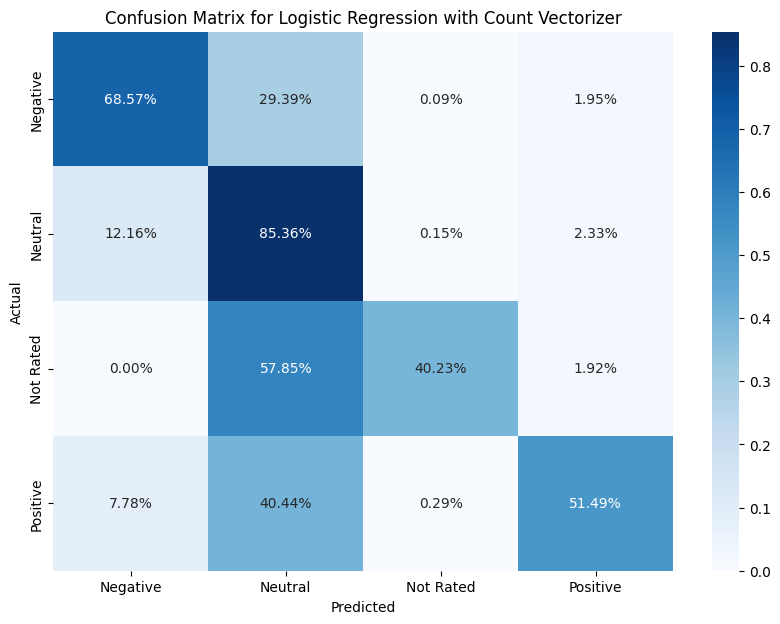

In [ ]:
original_label = ["Negative", "Neutral", "Not Rated", "Positive"]
plot_conf_matrix_multiclass(conf_matrix_logreg_count_multiclass, "Logistic Regression with Count Vectorizer", original_label)

In [ ]:
def visualize_model_output(y_actual, y_predict, mod_name):
    # Create DataFrame from actual and predicted values
    results = pd.DataFrame(np.c_[y_actual, y_predict], columns=['Actual Sentiment', 'Predicted Sentiment'])

    # Segment the results into Anti and Pro Brexit
    anti_brexit = results[results['Position'] == 0]
    pro_brexit = results[results['Position'] == 1]

    # Aggregate the counts of each sentiment category for Actual and Predicted
    anti_brexit_actual_counts = anti_brexit['Actual Sentiment'].value_counts().sort_index()
    anti_brexit_predicted_counts = anti_brexit['Predicted Sentiment'].value_counts().sort_index()
    pro_brexit_actual_counts = pro_brexit['Actual Sentiment'].value_counts().sort_index()
    pro_brexit_predicted_counts = pro_brexit['Predicted Sentiment'].value_counts().sort_index()

    # Display sentiment counts
    print("Actual Sentiment Counts:")
    print(anti_brexit_actual_counts)
    print("\nPredicted Sentiment Counts:")
    print( anti_brexit_predicted_counts)

    # Define sentiment labels for the x-axis
    sentiment_labels = ['Negative', 'Neutral', 'Not Rated', 'Positive']

    # Plotting for Anti Brexit Tweets
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(np.arange(len(sentiment_labels)) - 0.2, anti_brexit_actual_counts, width=0.4, label='Actual', color='blue')
    plt.bar(np.arange(len(sentiment_labels)) + 0.2, anti_brexit_predicted_counts, width=0.4, label='Predicted', color='orange')
    plt.title("Sentiment Comparison for Anti Brexit Tweets")
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(ticks=np.arange(len(sentiment_labels)), labels=sentiment_labels)
    plt.legend()

    # Plotting for Pro Brexit Tweets
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(len(sentiment_labels)) - 0.2, pro_brexit_actual_counts, width=0.4, label='Actual', color='blue')
    plt.bar(np.arange(len(sentiment_labels)) + 0.2, pro_brexit_predicted_counts, width=0.4, label='Predicted', color='orange')
    plt.title("Sentiment Comparison for Pro Brexit Tweets")
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(ticks=np.arange(len(sentiment_labels)), labels=sentiment_labels)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
visualize_model_output(y_test, y_pred_logreg_count, 'Logistic Regression Count Vectorizer')

In [59]:
#Counting the labels for each sentiment in y_test
negative = 0
neutral = 0
not_rated = 0
positive = 0

for item in y_test:
    if item == 0:
        negative += 1
    elif item == 1:
        neutral += 1
    elif item == 2:
        not_rated += 1
    elif item == 3:
        positive += 1

print("Negative:", negative)
print("Neutral:", neutral)
print("Not Rated:", not_rated)
print("Positive:", positive)

print(f"---------------------------------------------")
#Counting the labels for each sentiment in y_pred_logreg_count
neg_y_pred_logreg_count = 0
neu_y_pred_logreg_count = 0
not_rated_y_pred_logreg_count = 0
pos_y_pred_logreg_count = 0

for item in y_pred_logreg_count:
    if item == 0:
        neg_y_pred_logreg_count += 1
    elif item == 1:
        neu_y_pred_logreg_count += 1
    elif item == 2:
        not_rated_y_pred_logreg_count += 1
    elif item == 3:
        pos_y_pred_logreg_count += 1

print("Negative:", neg_y_pred_logreg_count)
print("Neutral:", neu_y_pred_logreg_count)
print("Not Rated:", not_rated_y_pred_logreg_count)
print("Positive:", pos_y_pred_logreg_count)

Negative: 8046
Neutral: 12478
Not Rated: 261
Positive: 2045
---------------------------------------------
Negative: 7193
Neutral: 13994
Not Rated: 137
Positive: 1506


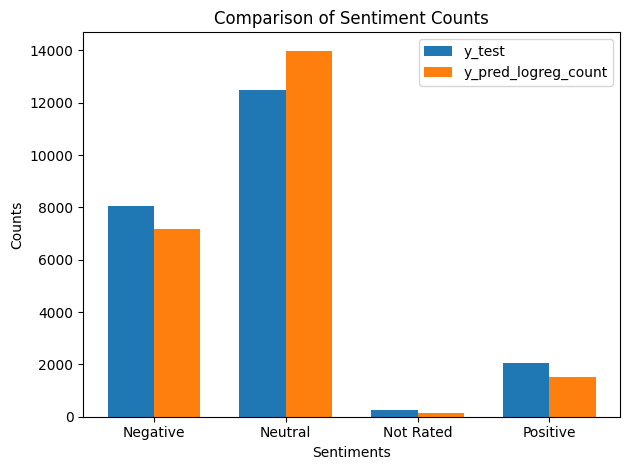

In [60]:
#Data from y_test
y_test_counts = [negative, neutral, not_rated, positive]

#Data from y_pred_logreg_count
y_pred_counts = [neg_y_pred_logreg_count, neu_y_pred_logreg_count, not_rated_y_pred_logreg_count, pos_y_pred_logreg_count]

#Bar chart settings
bar_width = 0.35
index = range(len(y_test_counts))

#Creating the bar chart
plt.bar(index, y_test_counts, bar_width, label='y_test')
plt.bar([i + bar_width for i in index], y_pred_counts, bar_width, label='y_pred_logreg_count')

#Labels, title, and legend
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.title('Comparison of Sentiment Counts')
plt.xticks([i + bar_width/2 for i in index], ['Negative', 'Neutral', 'Not Rated', 'Positive'])
plt.legend()

#Displaying the plot
plt.tight_layout()
plt.show()

In [61]:
df_no_qt.head()

,Hit Sentence,Sentiment,Position,tweet_clean
7,@JayneMonie1 @HowardJ91352838 @davesumnersmith...,Neutral,0,"money’s sunak, (with gove & cummings) behind p..."
17,@MPIainDS You have made it nigh on impossible ...,Neutral,0,made nigh impossible share european funding st...
21,@TheGhos72578902 @SallyAnnC3 @AndieHalihan @Ch...,Neutral,0,haven’t wrong yet. said would lose. did. said ...
36,@snb19692 FPTP - totally discredited! Not leas...,Negative,0,fptp - totally discredited! least derisory 17....
39,@pauld4dog @jarviboy1974uk @LloydHardy Superma...,Neutral,0,supermarkets main brexit supporters quiet. bre...


In [62]:
print(df_no_qt)

                                             Hit Sentence Sentiment  Position  \
7       @JayneMonie1 @HowardJ91352838 @davesumnersmith...   Neutral         0   
17      @MPIainDS You have made it nigh on impossible ...   Neutral         0   
21      @TheGhos72578902 @SallyAnnC3 @AndieHalihan @Ch...   Neutral         0   
36      @snb19692 FPTP - totally discredited! Not leas...  Negative         0   
39      @pauld4dog @jarviboy1974uk @LloydHardy Superma...   Neutral         0   
...                                                   ...       ...       ...   
147604  @sandieshoes We did have a fight, for years, t...   Neutral         1   
147610  @ExpoSpurs He’s just another pathetic sneering...  Negative         1   
147613  #BorisJohnsonOut inthegardenforaparty it’s not...   Neutral         1   
147626  @JamesRobvincent @7nestingwrens He was also fi...   Neutral         1   
147628  Ludicrous to suggest Boris is insulting Ukrain...  Negative         1   

                           

In [63]:
#Splitting the dataframe into Pro and Anti Brexit
pro_brexit_df_no_qt = df_no_qt[df_no_qt['Position'] == 1]
anti_brexit_df_no_qt = df_no_qt[df_no_qt['Position'] == 0]

#Displaying the resulting DataFrame
# print(pro_brexit_df_no_qt)
# print(anti_brexit_df_no_qt)

df_proBrexit = pd.DataFrame(pro_brexit_df_no_qt)
df_proBrexit.head(20000)

df_antiBrexit = pd.DataFrame(anti_brexit_df_no_qt)
df_antiBrexit.head(20000)

df_proBrexit.info()
df_antiBrexit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40387 entries, 2 to 147628
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Hit Sentence  40387 non-null  object
 1   Sentiment     40387 non-null  object
 2   Position      40387 non-null  int64 
 3   tweet_clean   40387 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35711 entries, 7 to 210572
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Hit Sentence  35711 non-null  object
 1   Sentiment     35711 non-null  object
 2   Position      35711 non-null  int64 
 3   tweet_clean   35711 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [83]:
#Creating a new dataframe with the testing data and the predictions
data = {'X_test': X_test, 'y_test': y_test, 'y_pred_logreg_count': y_pred_logreg_count}
df_new = pd.DataFrame(data)

#Displaying the content
df_new.head()
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22830 entries, 14931 to 117517
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   X_test               22830 non-null  object
 1   y_test               22830 non-null  int64 
 2   y_pred_logreg_count  22830 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 713.4+ KB


In [88]:
#Merging df_new with pro_brexit_df_no_qt based on common values in 'X_test' and 'tweet_clean'
merged_pro_brexit = pd.merge(df_new, pro_brexit_df_no_qt,how = 'inner', left_on='X_test', right_on='tweet_clean')
df_merged_pro_brexit = pd.DataFrame(merged_pro_brexit)


#Merging df_new with anti_brexit_df_no_qt based on common values in 'X_test' and 'tweet_clean'
merged_anti_brexit = pd.merge(df_new, anti_brexit_df_no_qt, how = 'inner',left_on='X_test', right_on='tweet_clean')
df_merged_anti_brexit = pd.DataFrame(merged_anti_brexit)

print(df_merged_pro_brexit['X_test'].duplicated().sum())
print(df_merged_pro_brexit['tweet_clean'].duplicated().sum())

df_merged_pro_brexit = df_merged_pro_brexit.drop_duplicates()


print(df_merged_anti_brexit['X_test'].duplicated().sum())
print(df_merged_anti_brexit['tweet_clean'].duplicated().sum())


df_merged_anti_brexit = df_merged_anti_brexit.drop_duplicates()
#Displaying the resulting merged DataFrames
print("Merged Pro-Brexit DataFrame:")
df_merged_pro_brexit.info()

print("\nMerged Anti-Brexit DataFrame:")
# print(df_merged_anti_brexit)
df_merged_anti_brexit.info()
# df_merged_anti_brexit.describe()
# df_merged_anti_brexit.isnull().sum()

# df_merged_pro_brexit.isnull().sum()
# df_merged_anti_brexit.shape()
# print(df_merged_pro_brexit.shape())

31961
31961
36616
36616
Merged Pro-Brexit DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13573 entries, 0 to 43899
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   X_test               13573 non-null  object
 1   y_test               13573 non-null  int64 
 2   y_pred_logreg_count  13573 non-null  int64 
 3   Hit Sentence         13573 non-null  object
 4   Sentiment            13573 non-null  object
 5   Position             13573 non-null  int64 
 6   tweet_clean          13573 non-null  object
dtypes: int64(3), object(4)
memory usage: 848.3+ KB

Merged Anti-Brexit DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11945 entries, 0 to 47231
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   X_test               11945 non-null  object
 1   y_test               11945 non-null  int64 
 2   y_pred

In [89]:
pro_brexit_y_pred = df_merged_pro_brexit['y_pred_logreg_count']
pro_brexit_y_test = df_merged_pro_brexit['Sentiment']

#Counting the real sentiment for pro Brexit
pro_brexit_neg_y_test = 0
pro_brexit_neu_y_test = 0
pro_brexit_not_rated_y_test = 0
pro_brexit_pos_y_test = 0

for item in pro_brexit_y_test:
    if item == "Negative":
        pro_brexit_neg_y_test += 1
    elif item == "Neutral":
        pro_brexit_neu_y_test += 1
    elif item == "Not Rated":
        pro_brexit_not_rated_y_test += 1
    elif item == "Positive":
        pro_brexit_pos_y_test += 1

print("Negative:", pro_brexit_neg_y_test)
print("Neutral:", pro_brexit_neu_y_test)
print("Not Rated:", pro_brexit_not_rated_y_test)
print("Positive:", pro_brexit_pos_y_test)
print(f"---------------------------------------------")

#Counting the predicted sentiment for pro Brexit
pro_brexit_neg_y_pred_logreg_count = 0
pro_brexit_neu_y_pred_logreg_count = 0
pro_brexit_not_rated_y_pred_logreg_count = 0
pro_brexit_pos_y_pred_logreg_count = 0

for item in pro_brexit_y_pred:
    if item == 0:
        pro_brexit_neg_y_pred_logreg_count += 1
    elif item == 1:
        pro_brexit_neu_y_pred_logreg_count += 1
    elif item == 2:
        pro_brexit_not_rated_y_pred_logreg_count += 1
    elif item == 3:
        pro_brexit_pos_y_pred_logreg_count += 1

print("Negative:", pro_brexit_neg_y_pred_logreg_count)
print("Neutral:", pro_brexit_neu_y_pred_logreg_count)
print("Not Rated:", pro_brexit_not_rated_y_pred_logreg_count)
print("Positive:", pro_brexit_pos_y_pred_logreg_count)

Negative: 4335
Neutral: 7414
Not Rated: 364
Positive: 1460
---------------------------------------------
Negative: 3801
Neutral: 8883
Not Rated: 60
Positive: 829


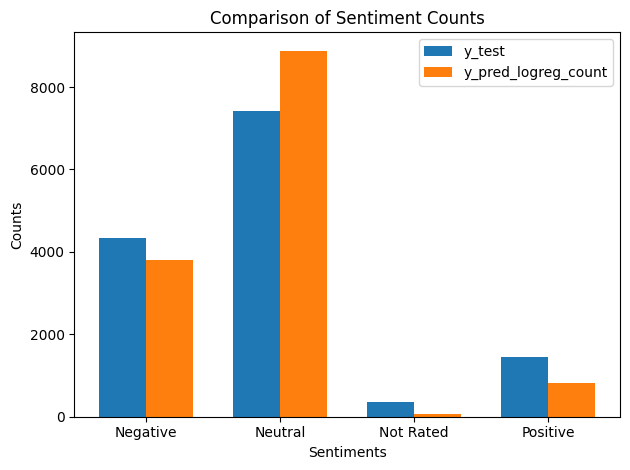

In [90]:
# Data from PRO Brexit
y_test_counts = [pro_brexit_neg_y_test, pro_brexit_neu_y_test, pro_brexit_not_rated_y_test, pro_brexit_pos_y_test]

# Data from y_pred_logreg_count
y_pred_counts = [pro_brexit_neg_y_pred_logreg_count, pro_brexit_neu_y_pred_logreg_count, pro_brexit_not_rated_y_pred_logreg_count, pro_brexit_pos_y_pred_logreg_count]

# Bar chart settings
bar_width = 0.35
index = range(len(y_test_counts))

# Creating the bar chart
plt.bar(index, y_test_counts, bar_width, label='y_test')
plt.bar([i + bar_width for i in index], y_pred_counts, bar_width, label='y_pred_logreg_count')

# Labels, title, and legend
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.title('Comparison of Sentiment Counts')
plt.xticks([i + bar_width/2 for i in index], ['Negative', 'Neutral', 'Not Rated', 'Positive'])
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

In [91]:
anti_brexit_y_pred = df_merged_anti_brexit['y_pred_logreg_count']
anti_brexit_y_test = df_merged_anti_brexit['Sentiment']

#Counting the real sentiment for pro Brexit
anti_brexit_neg_y_test = 0
anti_brexit_neu_y_test = 0
anti_brexit_not_rated_y_test = 0
anti_brexit_pos_y_test = 0

for item in anti_brexit_y_test:
    if item == "Negative":
        anti_brexit_neg_y_test += 1
    elif item == "Neutral":
        anti_brexit_neu_y_test += 1
    elif item == "Not Rated":
        anti_brexit_not_rated_y_test += 1
    elif item == "Positive":
        anti_brexit_pos_y_test += 1

print("REAL SENTIMENT")
print("Negative:", anti_brexit_neg_y_test)
print("Neutral:", anti_brexit_neu_y_test)
print("Not Rated:", anti_brexit_not_rated_y_test)
print("Positive:", anti_brexit_pos_y_test)
print(f"---------------------------------------------")


#Counting the labels for each sentiment in y_pred_logreg_count
anti_brexit_neg_y_pred_logreg_count = 0
anti_brexit_neu_y_pred_logreg_count = 0
anti_brexit_not_rated_y_pred_logreg_count = 0
anti_brexit_pos_y_pred_logreg_count = 0

for item in anti_brexit_y_pred:
    if item == 0:
        anti_brexit_neg_y_pred_logreg_count += 1
    elif item == 1:
        anti_brexit_neu_y_pred_logreg_count += 1
    elif item == 2:
        anti_brexit_not_rated_y_pred_logreg_count += 1
    elif item == 3:
        anti_brexit_pos_y_pred_logreg_count += 1

print("PREDICTED SENTIMENT")
print("Negative:", anti_brexit_neg_y_pred_logreg_count)
print("Neutral:", anti_brexit_neu_y_pred_logreg_count)
print("Not Rated:", anti_brexit_not_rated_y_pred_logreg_count)
print("Positive:", anti_brexit_pos_y_pred_logreg_count)

REAL SENTIMENT
Negative: 4077
Neutral: 5980
Not Rated: 691
Positive: 1197
---------------------------------------------
PREDICTED SENTIMENT
Negative: 3648
Neutral: 7460
Not Rated: 78
Positive: 759


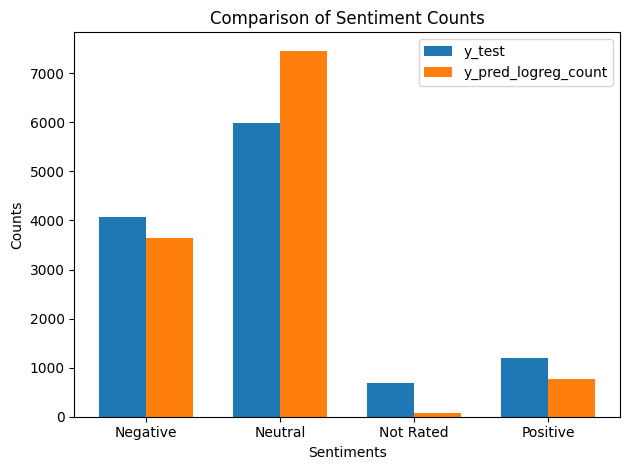

In [92]:
# Data from
y_test_counts = [anti_brexit_neg_y_test, anti_brexit_neu_y_test, anti_brexit_not_rated_y_test, anti_brexit_pos_y_test]

# Data from y_pred_logreg_count
y_pred_counts = [anti_brexit_neg_y_pred_logreg_count, anti_brexit_neu_y_pred_logreg_count, anti_brexit_not_rated_y_pred_logreg_count, anti_brexit_pos_y_pred_logreg_count]

# Bar chart settings
bar_width = 0.35
index = range(len(y_test_counts))

# Creating the bar chart
plt.bar(index, y_test_counts, bar_width, label='y_test')
plt.bar([i + bar_width for i in index], y_pred_counts, bar_width, label='y_pred_logreg_count')

# Labels, title, and legend
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.title('Comparison of Sentiment Counts')
plt.xticks([i + bar_width/2 for i in index], ['Negative', 'Neutral', 'Not Rated', 'Positive'])
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()